In [2]:
%matplotlib inline

In [39]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy as hr
from scipy.spatial.distance import pdist, squareform

In [41]:
prescriber_data_16 = pd.read_csv('data/heme-onc_d_16.csv', delimiter='\t')
npi_claims = prescriber_data_16[['npi', 'drug_name','total_claim_count']]
npi_claims = pd.pivot_table(npi_claims, index='npi', columns='drug_name', values='total_claim_count', fill_value=0)
top_drugs = npi_claims.sum().sort_values()[::-1][:200].index
npi_claims_top = npi_claims[top_drugs]

# Kmeans clustering

In [4]:
km = KMeans(n_clusters=11)
km_fit_matrix = km.fit_transform(npi_claims)

In [5]:
centroids = km.cluster_centers_
np.argmax(centroids[0])
np.max(centroids[0])

13.044078190878544

In [6]:
top_10_0 = np.sort(centroids[0])[-11:]
min(top_10_0)

5.1178612495216225

# Hierachical heatmap

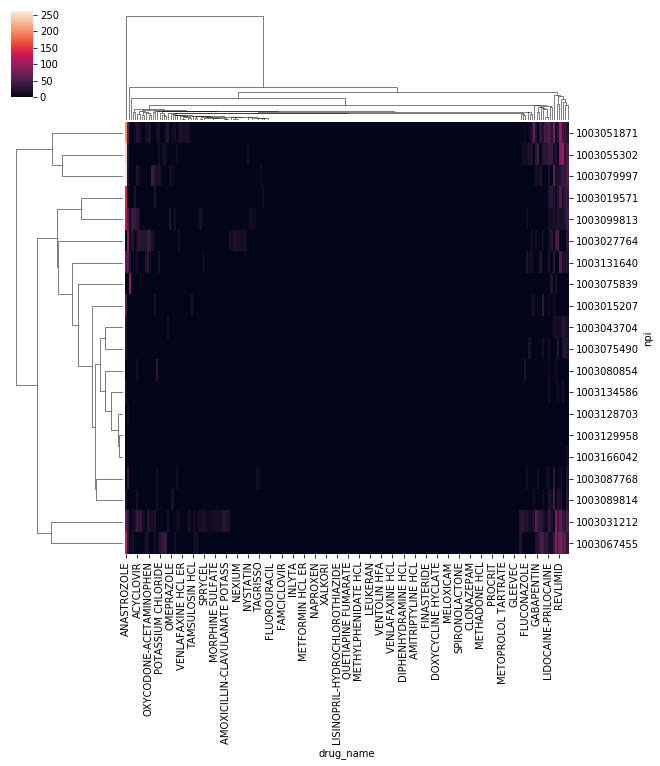

In [4]:
sns.clustermap(npi_claims_top[:20])

In [48]:
# Calculate distances

hr_dists = pdist(npi_claims_top[:500])
hr_dists.shape

hr_dist_sq = squareform(hr_dists)
hr_dist_sq.shape

hr_clusters = hr.linkage(hr_dist_sq, optimal_ordering=True)
hr_clusters.shape

(124750,)

/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """


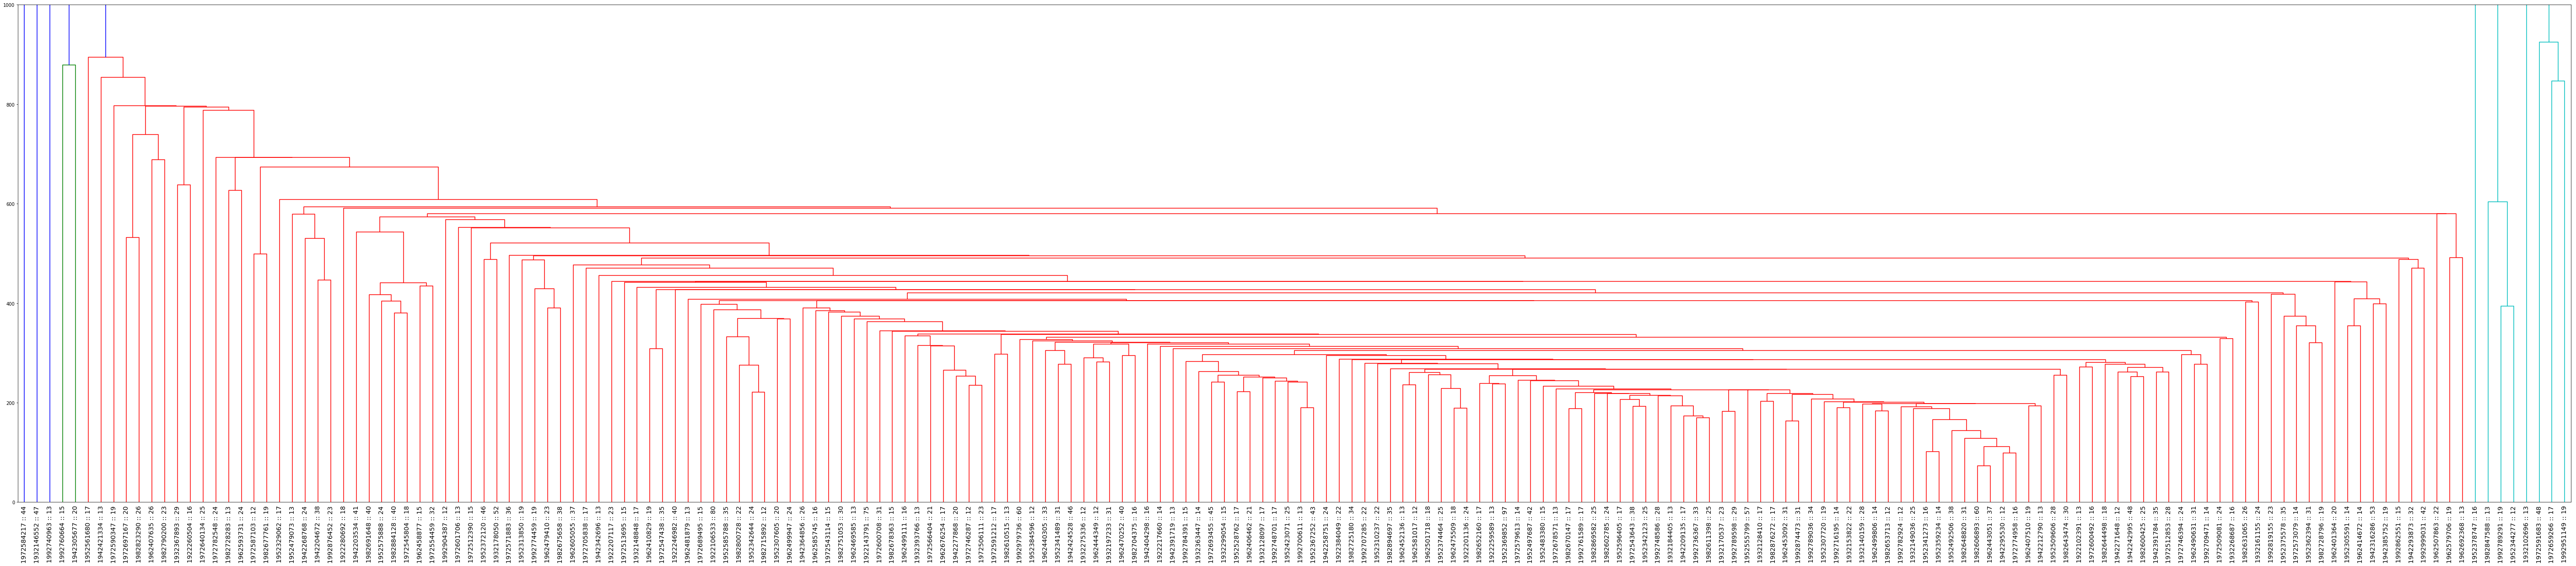

In [84]:
# Dendrogram of first 200 prescribers that have Imbruvica claims, and their number of Imbruvica claims
npi_claims_imbruvica = npi_claims_top[npi_claims_top['IMBRUVICA'] > 11]
hr_dists = pdist(npi_claims_imbruvica[:200])
hr_dist_sq = squareform(hr_dists)
hr_clusters = hr.linkage(hr_dist_sq, optimal_ordering=True)

fig, axes = plt.subplots(figsize=(100, 20))
labels = [str(x) + " :: " + str(y) for x, y in zip(npi_claims_imbruvica.index.values, npi_claims_imbruvica["IMBRUVICA"].values)]
hr_dendro = hr.dendrogram(hr_clusters, labels=labels, leaf_font_size=14, distance_sort=True)

plt.ylim(0, 1000)

plt.show()

/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


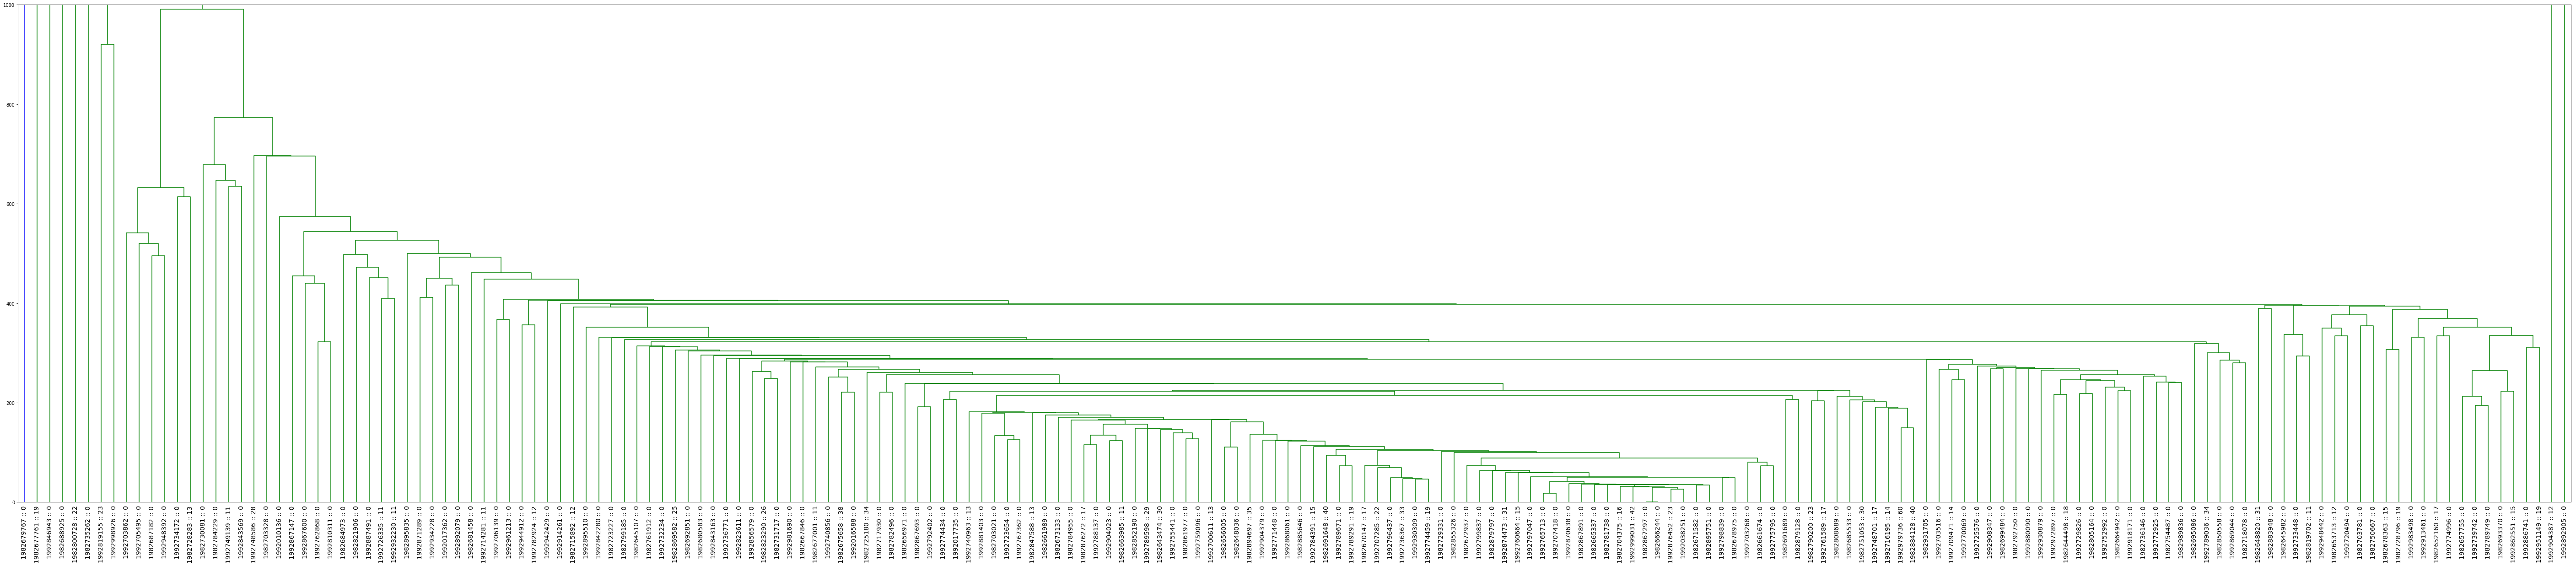

In [85]:
# Dendrogram of first 200 prescribers (of entire dataset) and the number of Imbruvica claims they have
hr_dists = pdist(npi_claims_top[:200])
hr_dist_sq = squareform(hr_dists)
hr_clusters = hr.linkage(hr_dist_sq, optimal_ordering=True)

fig, axes = plt.subplots(figsize=(100, 20))
labels = [str(x) + " :: " + str(y) for x, y in zip(npi_claims_top.index.values, npi_claims_top["IMBRUVICA"].values)]
hr_dendro = hr.dendrogram(hr_clusters, labels=labels, leaf_font_size=14, distance_sort=True)

plt.ylim(0, 1000)

plt.show()

In [103]:
#Identified a cluster of prescribers that had higher claims for Imbruvia: 1982751053, 1992748701, 1992716195, 1992979736, 1982884128

rand5_cluster = npi_claims_top.iloc[np.random.choice(len(npi_claims_top), 5)].sum()
imbr_cluster = npi_claims_top.loc[[982751053, 1992748701, 1992716195, 1992979736, 1982884128]].sum()

# Identify other top drugs that are largely prescribed greater than random selection
((imbr_cluster - rand5_cluster + 1)/(rand5_cluster + 1)).sort_values(ascending=False)

drug_name
RALOXIFENE HCL                    63.000000
LEVOFLOXACIN                      52.000000
GLEEVEC                           44.000000
HYDROMORPHONE HCL                 39.000000
NEUPOGEN                          28.000000
MONTELUKAST SODIUM                20.000000
ELIQUIS                           20.000000
OXYCONTIN                         20.000000
KLOR-CON M20                      18.000000
ESOMEPRAZOLE MAGNESIUM            18.000000
VALACYCLOVIR                      18.000000
CIPROFLOXACIN HCL                 16.000000
POMALYST                          15.000000
JANTOVEN                          15.000000
ANAGRELIDE HCL                    15.000000
TARCEVA                           13.000000
AMOXICILLIN-CLAVULANATE POTASS    13.000000
PROCHLORPERAZINE MALEATE           3.121212
ACYCLOVIR                          2.684211
TEMAZEPAM                          1.916667
IMBRUVICA                          1.770833
REVLIMID                           1.040541
LEVETIRACETAM         

In [131]:
# Identify drugs that have higher increased claims compared to random slection for 2016 data
np.random.seed(42)
quant_75 = npi_claims_top[npi_claims_top['IMBRUVICA'] >= 29].sum() #75% percentile
quant_rand = npi_claims_top.iloc[np.random.choice(len(npi_claims_top), 772)].sum() #random selection

corr_drugs = ((quant_75 - quant_rand)/(quant_rand)).sort_values(ascending=False)[:20]
corr_drugs

drug_name
ARANESP            27.080000
DAPSONE             7.814815
IMBRUVICA           5.248422
GILOTRIF            2.791367
XGEVA               2.590909
JADENU              2.579646
ZYDELIG             2.563218
VARUBI              2.507246
THALOMID            2.411392
GRANISETRON HCL     2.373333
PROCRIT             2.251185
NEULASTA            2.191304
POMALYST            2.180626
LONSURF             2.179688
ZARXIO              2.166667
BOSULIF             2.050360
NINLARO             2.041344
EMEND               1.994924
TAGRISSO            1.984496
TASIGNA             1.962394
dtype: float64

In [455]:
# Repeat for 2015 data
prescriber_data_15 = pd.read_csv('data/heme-onc_d_15.csv', delimiter='\t')
npi_claims_15 = prescriber_data_15[['npi', 'drug_name','total_claim_count']]
npi_claims_15 = pd.pivot_table(npi_claims_15, index='npi', columns='drug_name', values='total_claim_count', fill_value=0)
top_drugs_15 = npi_claims_15.sum().sort_values()[::-1][:200].index
npi_claims_top_15 = npi_claims_15[top_drugs_15]

np.random.seed(42)
quant_75_15 = npi_claims_top_15[npi_claims_top_15['IMBRUVICA'] >= 29].sum() #75% percentile
quant_rand_15 = npi_claims_top_15.iloc[np.random.choice(len(npi_claims_top_15), 772)].sum() #random selection

corr_drugs_15 = ((quant_75_15 - quant_rand_15 + 1)/(quant_rand_15 + 1)).sort_values(ascending=False)
corr_drugs_15

drug_name
IMBRUVICA                         4.384511
DAPSONE                           2.966292
ARANESP                           1.085714
FENOFIBRATE                       1.000000
PROCRIT                           0.991537
XGEVA                             0.892617
TASIGNA                           0.683193
LEUKERAN                          0.642512
ELIQUIS                           0.639130
POMALYST                          0.619541
MINOCYCLINE HCL                   0.500000
NEULASTA                          0.466077
LISINOPRIL-HYDROCHLOROTHIAZIDE    0.404762
METHYLPREDNISOLONE                0.388000
ACYCLOVIR                         0.365565
PROMACTA                          0.339241
VALACYCLOVIR                      0.326431
GRANISETRON HCL                   0.297170
METHYLPHENIDATE HCL               0.292398
KLOR-CON M20                      0.238445
AMOXICILLIN                       0.234286
METRONIDAZOLE                     0.219048
LANSOPRAZOLE                      0.208955
F

In [485]:
corr_drugs_15[40:150]

drug_name
CIPROFLOXACIN HCL                 0.035449
LIDOCAINE-PRILOCAINE              0.014452
CEPHALEXIN                        0.002632
NEUPOGEN                          0.000000
EXJADE                           -0.018480
HYDROMORPHONE HCL                -0.019486
AZITHROMYCIN                     -0.022453
VOTRIENT                         -0.030227
DIPHENOXYLATE-ATROPINE           -0.038168
SODIUM CHLORIDE                  -0.051402
TYKERB                           -0.053846
SERTRALINE HCL                   -0.058051
PAROXETINE HCL                   -0.077990
PREDNISONE                       -0.078894
FLUOXETINE HCL                   -0.084806
BUPROPION XL                     -0.088608
LIDOCAINE HCL VISCOUS            -0.094595
XARELTO                          -0.097274
MEGESTROL ACETATE                -0.101010
XTANDI                           -0.102367
PANTOPRAZOLE SODIUM              -0.113585
TARCEVA                          -0.116406
OXYCODONE-ACETAMINOPHEN          -0.126112
Z

In [137]:
[drug for drug in corr_drugs_15.index.values if drug in corr_drugs.index.values]

['IMBRUVICA',
 'DAPSONE',
 'ARANESP',
 'PROCRIT',
 'XGEVA',
 'TASIGNA',
 'POMALYST',
 'NEULASTA',
 'GRANISETRON HCL']

In [221]:
npi_claims_15_corr = npi_claims_15.loc[npi_claims_15['IMBRUVICA'] >= 100, corr_drugs_15.index.values]
npi_claims_15_corr.shape

(10, 20)

In [242]:
npi_claims_15_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1265518377 to 1407946460
Data columns (total 20 columns):
IMBRUVICA                         60 non-null object
DAPSONE                           60 non-null object
ARANESP                           60 non-null object
FENOFIBRATE                       60 non-null float64
PROCRIT                           60 non-null object
XGEVA                             60 non-null object
TASIGNA                           60 non-null object
LEUKERAN                          60 non-null object
ELIQUIS                           60 non-null object
POMALYST                          60 non-null object
MINOCYCLINE HCL                   60 non-null object
NEULASTA                          60 non-null object
LISINOPRIL-HYDROCHLOROTHIAZIDE    60 non-null object
METHYLPREDNISOLONE                60 non-null object
ACYCLOVIR                         60 non-null object
PROMACTA                          60 non-null object
VALACYCLOVIR                   

In [337]:
npi_claims_15.loc[quant[0] <= npi_claims_15['IMBRUVICA'] < quant[1]) & (npi_claims_15['IMBRUVICA'] < quant[1])]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [362]:
# figure out how to make the selection of below only pick from between quantiles
quant = (0.8, 0.99)
threshold1 = npi_claims_15['IMBRUVICA'].quantile(quant[0])
threshold2 = npi_claims_15['IMBRUVICA'].quantile(quant[1])
mask = (npi_claims_15['IMBRUVICA'] >= threshold1) & (npi_claims_15['IMBRUVICA'] < threshold2)
#npi_claims_15[mask]['IMBRUVICA']
# df = npi_claims_15.loc[np.random.choice(npi_claims_15[mask].index.values, 5), target_drugs].astype('float')
# df

In [375]:
target_drugs = ['REVLIMID', 
               'IMBRUVICA', 
               'IBRANCE', 
               'JAKAFI', 
               'XTANDI', 
               'GLEEVEC',
               'ZYTIGA', 
               'POMALYST', 
               'TASIGNA', 
               'SPRYCEL', 
               'TARCEVA', 
               'PROMACTA', 
               'PROCRIT', 
               'NEXAVAR',
               'XARELTO',         
               'DAPSONE',
                ]

npi_claims_15_agg = pd.DataFrame(columns=target_drugs)
npi_claims_15_agg.index.names = ['npi']
# Initiate with physicians that do not prescribe drug
df_0 = npi_claims_15.loc[np.random.choice(npi_claims_15[npi_claims_15['IMBRUVICA'] < 1].index.values, 20), target_drugs].astype('float')
npi_claims_15_agg = pd.concat((npi_claims_15_agg, df_0))

quants = [0.8, 0.9, 0.95, 0.99]
for i in quants:
    df = npi_claims_15.loc[np.random.choice(npi_claims_15[npi_claims_15['IMBRUVICA'] >= i].index.values, 40), target_drugs].astype('float')
    npi_claims_15_agg = pd.concat((npi_claims_15_agg, df))


npi_claims_15_agg.shape

(180, 16)

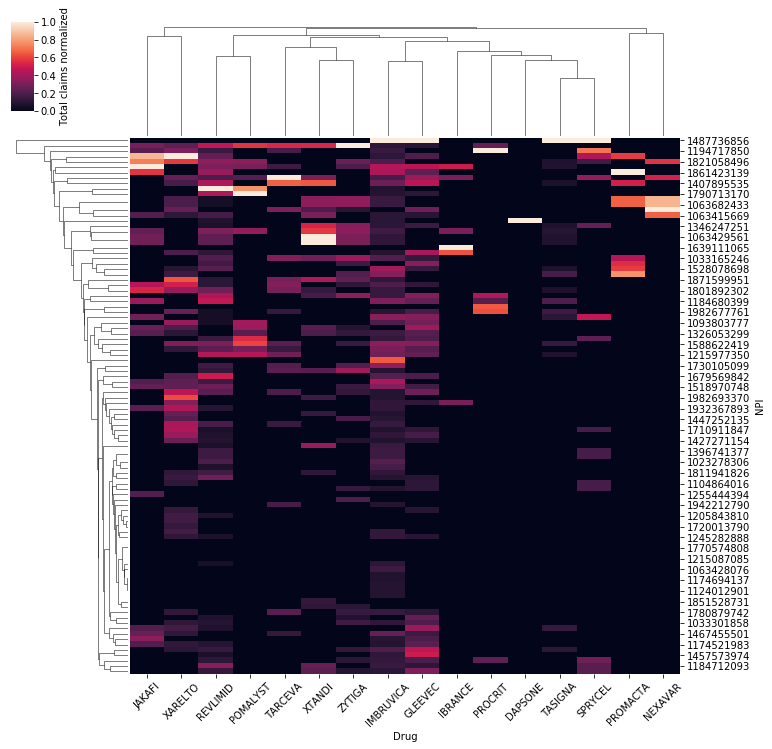

In [361]:
# Create heatmap based around these drugs

#Scale dataframe 
npi_claims_15_agg_scaled = (npi_claims_15_agg - npi_claims_15_agg.min()) / (npi_claims_15_agg.max() - npi_claims_15_agg.min())
npi_claims_15_agg_scaled.fillna(0, inplace=True)

#Change labels of columns for plotting
npi_claims_15_agg_scaled.columns.name = 'Drug'
npi_claims_15_agg_scaled.index.name = 'NPI'

#Plot heatmap
fig = sns.clustermap(npi_claims_15_agg_scaled, figsize=(12, 12))
plt.ylabel("Total claims normalized")
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=45);

In [ ]:
npi_claims_15_agg.

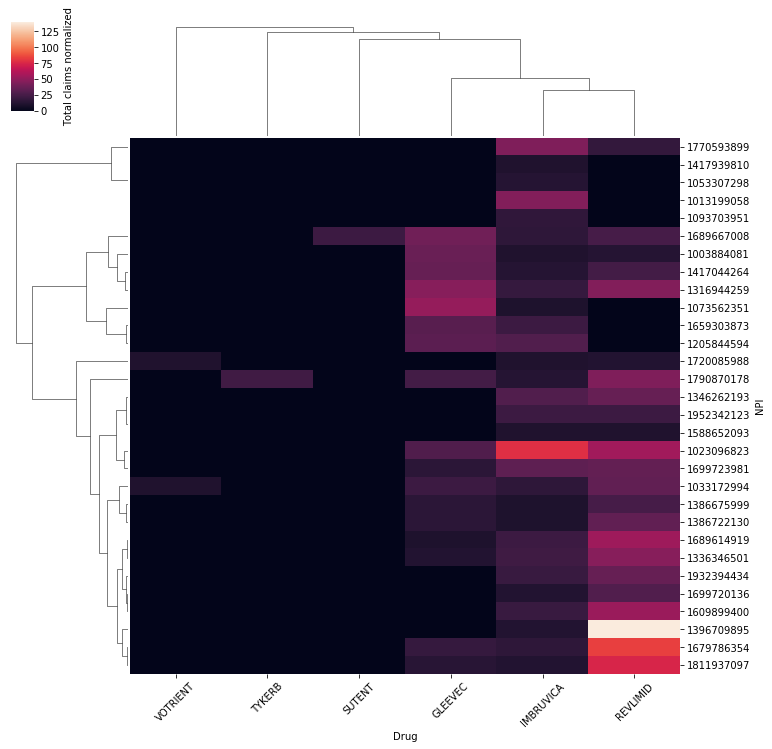

In [488]:
#Plot slimmed heatmap

target_drugs = ["IMBRUVICA", "GLEEVEC", "REVLIMID", 'TYKERB', "VOTRIENT", "SUTENT"]

npi_claims_15_agg = pd.DataFrame(columns=target_drugs)
npi_claims_15_agg.index.names = ['npi']
# Initiate with physicians that do not prescribe drug
# df_0 = npi_claims_15.loc[np.random.choice(npi_claims_15[npi_claims_15['IMBRUVICA'] < 1].index.values, 20), target_drugs].astype('float')
# npi_claims_15_agg = pd.concat((npi_claims_15_agg, df_0))

quants = [0.95]
for i in quants:
    df = npi_claims_15.loc[np.random.choice(npi_claims_15[npi_claims_15['IMBRUVICA'] >= i].index.values, 30), target_drugs].astype('float')
    npi_claims_15_agg = pd.concat((npi_claims_15_agg, df))

#Scale dataframe 
npi_claims_15_agg_scaled = (npi_claims_15_agg - npi_claims_15_agg.min()) / (npi_claims_15_agg.max() - npi_claims_15_agg.min())
npi_claims_15_agg_scaled.fillna(0, inplace=True)

#Change labels of columns for plotting
npi_claims_15_agg_scaled.columns.name = 'Drug'
npi_claims_15_agg_scaled.index.name = 'NPI'

fig = sns.clustermap(npi_claims_15_agg, figsize=(12, 12), metric='cosine')
plt.ylabel("Total claims normalized")
plt.setp(fig.ax_heatmap.get_xticklabels(), rotation=45);

No handles with labels found to put in legend.


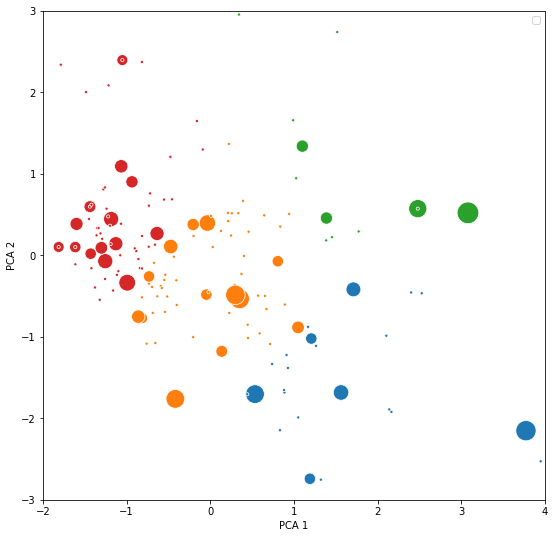

In [449]:
# Create Clustermap of npi_claims_15_agg

#scale data
npi_claims_15_agg_scaled = (npi_claims_15_agg - npi_claims_15_agg.mean()) / npi_claims_15_agg.std()

#PCA
pca = PCA(n_components=2)
npi_claims_15_pca = pca.fit_transform(npi_claims_15_agg_scaled)

#KMeans clustering
km = KMeans(n_clusters=5)
km.fit(npi_claims_15_pca)
predictions = km.predict(npi_claims_15_pca)

# Plot
fig = plt.figure(figsize=(9,9))
for i in range(km.n_clusters):
    sizes = ((npi_claims_15.loc[predictions == i, 'IMBRUVICA'] + 1) * 10).values
    sns.scatterplot(npi_claims_15_pca[predictions == i,0], npi_claims_15_pca[predictions == i,1], s=sizes)

plt.xlim(-2, 4)
plt.ylim(-3, 3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2');
plt.legend();

In [404]:
# view qualities of clusters
npi_claims_15_agg[predictions == 0].mean()

drug_name
REVLIMID     14.705357
IMBRUVICA    16.633929
IBRANCE       0.794643
JAKAFI        0.750000
XTANDI        3.133929
GLEEVEC       6.500000
ZYTIGA        3.098214
POMALYST      1.196429
TASIGNA       1.723214
SPRYCEL       0.937500
TARCEVA       1.500000
PROMACTA      0.678571
PROCRIT       0.928571
NEXAVAR       0.205357
XARELTO       7.392857
DAPSONE       1.089286
dtype: float64

In [405]:
npi_claims_15_agg[predictions == 1].mean()

drug_name
REVLIMID       0.0
IMBRUVICA    127.0
IBRANCE        0.0
JAKAFI         0.0
XTANDI         0.0
GLEEVEC      102.0
ZYTIGA         0.0
POMALYST       0.0
TASIGNA      145.0
SPRYCEL       65.0
TARCEVA        0.0
PROMACTA       0.0
PROCRIT        0.0
NEXAVAR        0.0
XARELTO        0.0
DAPSONE        0.0
dtype: float64

In [406]:
npi_claims_15_agg[predictions == 2].mean()

drug_name
REVLIMID     38.048780
IMBRUVICA    19.365854
IBRANCE       4.487805
JAKAFI       13.097561
XTANDI       10.926829
GLEEVEC      17.585366
ZYTIGA       15.121951
POMALYST      3.170732
TASIGNA       4.146341
SPRYCEL       1.365854
TARCEVA      11.121951
PROMACTA      2.317073
PROCRIT       8.829268
NEXAVAR       0.268293
XARELTO      29.243902
DAPSONE       0.000000
dtype: float64

In [407]:
npi_claims_15_agg[predictions == 3].mean()

drug_name
REVLIMID     60.00
IMBRUVICA    37.30
IBRANCE       0.55
JAKAFI        4.40
XTANDI        8.25
GLEEVEC      33.65
ZYTIGA       10.80
POMALYST     16.15
TASIGNA      13.30
SPRYCEL       8.90
TARCEVA       8.30
PROMACTA      2.00
PROCRIT       3.25
NEXAVAR       0.00
XARELTO      12.85
DAPSONE       1.45
dtype: float64

In [408]:
npi_claims_15_agg[predictions == 4].mean()

drug_name
REVLIMID     48.833333
IMBRUVICA    23.166667
IBRANCE       5.500000
JAKAFI        9.500000
XTANDI        4.666667
GLEEVEC      42.166667
ZYTIGA       20.500000
POMALYST      9.666667
TASIGNA       4.166667
SPRYCEL       6.000000
TARCEVA      56.000000
PROMACTA      5.833333
PROCRIT       9.166667
NEXAVAR      11.166667
XARELTO      55.500000
DAPSONE       0.000000
dtype: float64

Hierarchical clustering is computationally intensive than Kmeans. In order to visualize a dendogram that is sensible (doesn't have too much data, I will subset the dataset that only contains physicians that have at least claims from the first 200 drugs.

I used the pdist function to compute a similarity matrix of our data (pairwise distances), using Euclidean distance.

Use scipy's squareform function to get our long vector of distances back into a square matrix. Look at the shape of this new matrix.

Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

Visualize clusters using dendrogram.

To make your clusters more interpretable, change the labels on the data to be the titles of the articles. Can you find any interesting clusters or discover any topics not present in the NYT sections? Are there any overlaps with the Kmeans topics and the hierarchical topics?

In addition, we might also be interested in how these hierarchical clusters compare to the NYT sections. Label each point not only with the title but also the NYT section it belongs to. Do any cross section topics emerge?

Explore different clusterings on a per section basis. Perform the same analysis on each of the Arts, Books, and Movies sections (i.e. cluster one section at a time).

Repeat this process using cosine similarity (and if you have time, Pearson correlation and the Jaccard distance). Read about scipys distance metrics here. Why might cosine distance be better for clustering the words of our articles?

Compare the clusters returned with cosine and Euclidean distance metrics.

We have visualized similarity between articles, but we can also see which words are similar and co-occur. This dendrogram is somewhat less-sensical, but lets look at it anyway. First limit the number of features with the vectorizer (if you haven't already). 500-1000 words is probably the limit of what you can visualize effectively. Transpose your feature matrix so now rows correspond to words and the columns correspond to the articles.

Perform the same analysis as above and inspect the dendrogram with the words from the articles. Anything you wouldn't expect?

